In [ ]:
!pip install transformers==3.5.0
!pip install nltk

     |████████████████████████████████| 1.3MB 14.7MB/s 
     |████████████████████████████████| 890kB 50.6MB/s 
     |████████████████████████████████| 2.9MB 48.8MB/s 
     |████████████████████████████████| 1.1MB 50.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=c900a6d2f191b933a5d23a1367fa5a4a6e627ca889006888187e8ba45a05a04b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import os
import io
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel, BertForPreTraining
import nltk
from sklearn.model_selection import train_test_split
import re
import ast 
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/train/text

/content/drive/My Drive/MeasEval-main/data/train/train/text


In [ ]:
files=os.listdir()

In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/dev/text

/content/drive/My Drive/MeasEval-main/data/train/dev/text


In [ ]:
files_val=os.listdir()

In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/train

/content/drive/My Drive/MeasEval-main/data/train/train


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels, tokenizer):

    
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)
    # print(len(tokenized_sentence))
    # print(len(labels))
    return tokenized_sentence, labels

In [ ]:
l=0
NERdata=[]
for i in files:
  
  pathtxt=os.path.join('text',i)
  
  with open(pathtxt, 'r') as f:
    text=f.read()
  pathtsv=os.path.join('tsv',i[:-3]+'tsv')
  if(not(os.path.exists(pathtsv))):
    continue
  filetsv=pd.read_csv(pathtsv,sep = '\t')
  entity=filetsv[['annotType','startOffset','endOffset','text','other']]
  entity=entity[entity['annotType']=='Quantity']
  
  entity = entity.to_numpy().tolist()

  ent=0
  offset=0
  sent_text = nltk.sent_tokenize(text)
  
  for j in sent_text:
    row=[]
    row.append(i[:-4])
    
    
    ent_sen=[]
    ret = [(m.group(0), m.start(), m.end() - 1) for m in re.finditer(r'\S+', j)]
    start=[]
    
    for word in ret:
      types=[]
      # other=[]
      for ent_doc in entity:
        
        if(offset+word[1]>=ent_doc[1] and offset+word[2]<=ent_doc[2]):
          dictio={}
          if(not pd.isnull(ent_doc[4])):
            dictio=ast.literal_eval(ent_doc[4])

          
          if('mods' in dictio):
            info=dictio['mods']
            
            if('IsCount' in info):
              types.append("Count")
              
            else:
              types.append("Measurement")
          else:
            types.append("Measurement")


        # print(word,types,dictio)
      
      ent_sen.append(types)     
    
    # print(ent_sen)
    sen,label=tokenize_and_preserve_labels(j.split(' '),ent_sen,tokenizer)
    label.insert(0,[])
    label.append([])
    offset+=(1+len(j))
    # print(j)
    # print(label)
    row.append(j)
    row.append(label)
    
    NERdata.append(row)
    
  
  
  
  

In [ ]:
NERdf=pd.DataFrame (NERdata, columns = ['Id','Text','Entity'])

In [ ]:
cd /content/drive/My Drive/MeasEval-main/data/train/dev

/content/drive/My Drive/MeasEval-main/data/train/dev


In [ ]:
l=0
NERdata=[]
for i in files_val:
  
  pathtxt=os.path.join('text',i)
  
  with open(pathtxt, 'r') as f:
    text=f.read()
  pathtsv=os.path.join('tsv',i[:-3]+'tsv')
  if(not(os.path.exists(pathtsv))):
    continue
  filetsv=pd.read_csv(pathtsv,sep = '\t')
  entity=filetsv[['annotType','startOffset','endOffset','text','other']]
  entity=entity[entity['annotType']=='Quantity']
  
  entity = entity.to_numpy().tolist()

  ent=0
  offset=0
  sent_text = nltk.sent_tokenize(text)
  
  for j in sent_text:
    row=[]
    row.append(i[:-4])
    
    
    ent_sen=[]
    ret = [(m.group(0), m.start(), m.end() - 1) for m in re.finditer(r'\S+', j)]
    start=[]
    
    for word in ret:
      types=[]
      # other=[]
      for ent_doc in entity:
        
        if(offset+word[1]>=ent_doc[1] and offset+word[2]<=ent_doc[2]):
          dictio={}
          if(not pd.isnull(ent_doc[4])):
            dictio=ast.literal_eval(ent_doc[4])

          
          if('mods' in dictio):
            info=dictio['mods']
            
            if('IsCount' in info):
              types.append("Count")
              
            else:
              types.append("Measurement")
          else:
            types.append("Measurement")


        # print(word,types,dictio)
      
      ent_sen.append(types)     
    
    # print(ent_sen)
    sen,label=tokenize_and_preserve_labels(j.split(' '),ent_sen,tokenizer)
    label.insert(0,[])
    label.append([])
    offset+=(1+len(j))
    # print(j)
    # print(label)
    row.append(j)
    row.append(label)
    
    NERdata.append(row)
    
  
  
  
  

In [ ]:
NERdf_val=pd.DataFrame (NERdata, columns = ['Id','Text','Entity'])


In [ ]:
def len_text(x):
  sum = 0
  for en in x:
    #print(en)
    if en==['Count']:
      sum += len(en)
  return sum

In [ ]:
NERdf_val["len"] = NERdf_val["Entity"].apply(lambda x: len_text(x))

In [ ]:
print(NERdf_val[NERdf_val["len"] != 0])

                          Id  ... len
0      S0031405612000728-769  ...   1
6     S0032063312003054-2501  ...   3
8     S0032063312003054-2501  ...   1
20    S0025322712001600-2230  ...   1
34     S0032063312002437-627  ...   3
71    S030881461301604X-1002  ...   1
143  S0022000014000026-18167  ...   1

[7 rows x 4 columns]


In [ ]:
NERdf["len"] = NERdf["Entity"].apply(lambda x: len_text(x))

In [ ]:
NERdf_nz = NERdf[NERdf["len"] != 0]

In [ ]:
#NERdf = pd.concat([NERdf_nz, NERdf_z])
NERdf = NERdf_nz

In [ ]:
NERdf.sample(frac=1)

,Id,Text,Entity,len
1354,S0012821X12004384-1302,"Five samples from below the CIE at 2619.60, 26...","[[], [Count], [], [], [], [], [], [], [], [Mea...",1
986,S0012821X13007309-1482,The FO (first occurrence) of the ammonite Wati...,"[[], [], [Count], [Count], [], [], [], [], [],...",2
361,S0167819113001051-1247,"Although each node has 18 cores, the intended ...","[[], [], [], [], [], [Count], [], [], [], [], ...",1
664,S0167610512002292-3305,The results from three different simulations a...,"[[], [], [], [], [Count], [], [], [], [], [], ...",1
627,S016412121300188X-5038,"As an answer to RQ7, this study finds that unl...","[[], [], [], [], [], [], [], [], [], [], [], [...",1
...,...,...,...,...
173,S0925443913001385-1638,In order to estimate the effect of the MRPL12 ...,"[[], [], [], [], [], [], [], [], [], [], [], [...",1
345,S175058361300203X-1638,"We studied two cases, one where the injection ...","[[], [], [], [Count], [], [], [], [], [], [], ...",1
445,S0019103511004994-1399,"Enceladus, one out of currently 62 satellites ...","[[], [], [], [], [], [], [], [], [], [], [Coun...",2
583,S1873506113001116-978,Serial passaging of two different hiPSC lines ...,"[[], [], [], [], [], [Count], [], [], [], [], ...",1


In [ ]:
len(NERdf)

73

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
text=NERdf['Text'].tolist()
textlabels=NERdf['Entity'].tolist()

for i in range(len(textlabels)):
  textlabels[i]=(textlabels[i] + 512 * [np.zeros(3)])[:512]

In [ ]:
text_val=NERdf_val['Text'].tolist()
textlabels_val=NERdf_val['Entity'].tolist()

for i in range(len(textlabels_val)):
  textlabels_val[i]=(textlabels_val[i] + 512 * [np.zeros(3)])[:512]

In [ ]:
print(len(textlabels[0][0]))

0


In [ ]:
inputs = tokenizer(text,max_length = 512,padding='max_length',truncation=True, return_tensors="pt")

In [ ]:
inputs_val = tokenizer(text_val,max_length = 512,padding='max_length',truncation=True, return_tensors="pt")

In [ ]:
import numpy as np

In [ ]:
train_seq = np.array(inputs['input_ids'])
train_mask = np.array(inputs['attention_mask'])

In [ ]:
val_seq = np.array(inputs_val['input_ids'])
val_mask = np.array(inputs_val['attention_mask'])

In [ ]:

count=0


onehot_labels = np.zeros((len(textlabels), len(textlabels[0]),1));
for i in range(len(textlabels)):
  for j in range(len(textlabels[0])):
    if len(textlabels[i][j])!=0:
      if (textlabels[i][j][0]=="Count"):
        count+=1
        onehot_labels[i][j][0] = 1
      

In [ ]:

count_val=0


onehot_labels_val = np.zeros((len(textlabels_val), len(textlabels_val[0]),1));
for i in range(len(textlabels_val)):
  for j in range(len(textlabels_val[0])):
    if len(textlabels_val[i][j])!=0:
      if (textlabels_val[i][j][0]=="Count"):
        count_val+=1
        onehot_labels_val[i][j][0] = 1
      

In [ ]:
val_y = onehot_labels_val
train_y = onehot_labels

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_seq), torch.from_numpy(train_mask),torch.from_numpy(train_y))
val_data = TensorDataset(torch.from_numpy(val_seq), torch.from_numpy(val_mask),torch.from_numpy(val_y))

In [ ]:
batch_size = 38
train_loader = DataLoader(train_data, shuffle=True, batch_size = batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size = batch_size)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
i=0
for param in model.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert, embed_dim, hidden_dim, drop_prob, n_layers, out_dim):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      self.bilstm = nn.LSTM(embed_dim, hidden_dim, n_layers,dropout=drop_prob,  bidirectional=True, batch_first=True)
      self.dropout = nn.Dropout(drop_prob)
      self.fc1 = nn.Linear(2*hidden_dim,256)
      self.r1=nn.Tanh()
      self.fc2 = nn.Linear(256,out_dim)
      self.sf = nn.Sigmoid()

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      embed, cls_hs = self.bert(sent_id, attention_mask=mask)
      x,_ = self.bilstm(embed)
      x = self.dropout(x)
      x = self.fc1(x)
      x = self.r1(x)
      x = self.fc2(x)
      x = self.sf(x)

      return x



In [ ]:
device = torch.device("cuda")

In [ ]:
bert_model = BERT_Arch(model, 768, 256, 0.5, 1,1)
bert_model = bert_model.to(device)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
def weighted_binary_cross_entropy(output, target, weights=None):
    output = torch.clamp(output,min=1e-8,max=1-1e-8)

    if weights is not None:
        assert len(weights) == 2
        loss = weights[1] * (target * torch.log(output)) + \
               weights[0] * ((1 - target) * torch.log(1 - output))
    else:
        loss = target * torch.log(output) + (1 - target) * torch.log(1 - output)

    return torch.neg(torch.mean(loss))

In [ ]:
from transformers import AdamW

#criterion = nn.CrossEntropyLoss(weight=weights.to(device))
criterion=nn.BCELoss()
optimizer = AdamW(bert_model.parameters(), lr = 1e-3)

In [ ]:
bert_model=torch.load('/content/drive/My Drive/Model/count_t95_f70_ep20_sirdata.pt')

In [ ]:
print(bert_model)

BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [ ]:
count_total=0
count_pred=0
meas_total=0
meas_pred=0
remain_total=0
remain_pred=0
for seq, mask, y in val_loader:
    bert_model.zero_grad()
    bert_model.eval()
    y_pred = bert_model(seq.to(device), mask.to(device))
    #y_pred = torch.transpose(y_pred, 2,1)
    #y = torch.transpose(y, 2,1)
    
    #_, target = y.max(dim=1)
    #_, predicted=y_pred.max(dim=1)
    target = y.cpu().data.numpy()
    predicted = y_pred.cpu().data.numpy()
    
    # print(target.shape,predicted.shape)
    for i in range(len(target)):
      for j in range(len(target[i])):
        if(target[i][j]==0):
          if(target[i][j]==predicted[i][j]):
            remain_pred+=1
          remain_total+=1

        elif(target[i][j]==1):
          if(target[i][j]==predicted[i][j]):
            count_pred+=1
          count_total+=1

        elif(target[i][j]==2):
          if(target[i][j]==predicted[i][j]):
            meas_pred+=1
          meas_total+=1



    # for i in range(np_out.shape[0]):
    #   for j in range(np_out.shape[1]):
    #     for k in range(np_out.shape[2]):
    #       if np_out[i][j][k]>=0.2:
    #         np_out[i][j][k]=1
    #       else:
    #         np_out[i][j][k]=0
    
    
    #print(np.where(np_out==1))
    #print("##########")
    #print(np.where(np_act==1))

    # for i in range(np_out.shape[0]):
    #   for j in range(np_out.shape[1]):
    #     if np.max(np_out[i,j,:])==1 or np.max(np_act[i,j,:])==1:
    #       if np.max(np_out[i,j,:])==1 and np.max(np_act[i,j,:])==1:
    #         pos = pos + 1
    #       else:
    #         neg = neg + 1

    # /for i in range(np_out.shape[0]):
    #  for j in range(np_out.shape[1]):
    #    for k in range(np_out.shape[2]):
    #      if (np_out[i,j,k])==1 or (np_act[i,j,k])==1:
    #        if (np_out[i,j,k])==1 and (np_act[i,j,k])==1:
    #          pos = pos + 1
    #        else:
    #          neg = neg + 1

# print(pos/(pos+neg))
    

In [ ]:
print(meas_pred,meas_total)

0 0


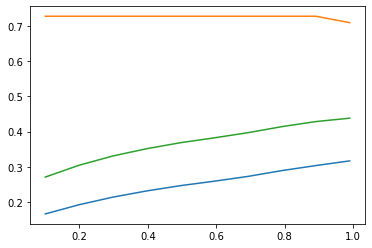

[0.99]


In [ ]:
import matplotlib.pyplot as plt
best_threshold=[]
for k in range(1):
  m=0
  best_t=0
  prec_num = 0 
  prec_den = 0
  rec_num = 0
  rec_den = 0 
  threshold = np.linspace(0.1,0.99,10)
  f1 = []
  pre = []
  rec = []
  for t in threshold:
    for seq, mask, y in val_loader:
      bert_model.zero_grad()
      bert_model.eval()
      y_pred = bert_model(seq.to(device), mask.to(device))
      np_out = y_pred.cpu().data.numpy()
      np_act = y.cpu().data.numpy()
      #print(np_out)
    
      for i in range(np_out.shape[0]):
        for j in range(np_out.shape[1]):
        
          if np_out[i][j][k]>=t:
            np_out[i][j][k]=1
          else:
            np_out[i][j][k]=0

      for i in range(np_out.shape[0]):
        for j in range(np_out.shape[1]):
          if np_out[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              prec_num = prec_num + 1
            else:
              prec_den = prec_den + 1
          if np_act[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              rec_num = rec_num + 1
            else:
              rec_den = rec_den + 1

    precision = prec_num/(prec_num+prec_den)
    recall = rec_num/(rec_num+rec_den)
    F1 = 2*precision*recall/(precision+recall)
    f1.append(F1)
    pre.append(precision)
    rec.append(recall)
    if F1>m:
      best_t = t
    m = max(m,F1)
  best_threshold.append(best_t)
  plt.plot(threshold,pre)
  plt.plot(threshold,rec)
  plt.plot(threshold,f1)
  plt.show()
print(best_threshold)

In [ ]:
p=0
n=0
pos=0
neg=0
prec_num = 0 
prec_den = 0
rec_num = 0
rec_den = 0 
p1 = 0
n1=0
for seq, mask, y in val_loader:
    bert_model.zero_grad()
    bert_model.eval()
    y_pred = bert_model(seq.to(device), mask.to(device))
    np_out = y_pred.cpu().data.numpy()
    np_act = y.cpu().data.numpy()
    
    
    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        for k in range(np_out.shape[2]):
          if np_out[i][j][k]>=0.95:
            np_out[i][j][k]=1
          else:
            np_out[i][j][k]=0

    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        if np.max(np_out[i,j,:])==1 or np.max(np_act[i,j,:])==1:
          if np.max(np_out[i,j,:])==1 and np.max(np_act[i,j,:])==1:
            p1 = p1 + 1
          else:
            n1 = n1 + 1

    for i in range(np_out.shape[0]):
      for j in range(np_out.shape[1]):
        for k in range(np_out.shape[2]):
          if np_out[i,j,k] == np_act[i,j,k]:
            p = p +1
          else:
            n=n+1
          if (np_out[i,j,k])==1 or (np_act[i,j,k])==1:
            if (np_out[i,j,k])==1 and (np_act[i,j,k])==1:
              pos = pos + 1
            else:
              neg = neg + 1
          if np_out[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              prec_num = prec_num + 1
            else:
              prec_den = prec_den + 1
          if np_act[i,j,k]==1:
            if np_out[i,j,k]==np_act[i,j,k]:
              rec_num = rec_num + 1
            else:
              rec_den = rec_den + 1

precision = prec_num/(prec_num+prec_den)
recall = rec_num/(rec_num+rec_den)
F1 = 2*precision*recall/(precision+recall)

print("Entity recognition modified accuracy:-" + str(p1/(p1+n1)))
print("--------COUNT RESULTS--------")
print("Accuracy:-" + str(p/(n+p)))
print("Modified Accuracy:-" + str(pos/(pos+neg)))
print("Precision:-" + str(precision))
print("Recall:-" + str(recall))
print("F1 score:-"+str(F1))

Entity recognition modified accuracy:-0.5333333333333333
--------COUNT RESULTS--------
Accuracy:-0.9999312971105527
Modified Accuracy:-0.5333333333333333
Precision:-0.6666666666666666
Recall:-0.7272727272727273
F1 score:-0.6956521739130435


In [ ]:
s = "I have 2 in my pocket, which are 99% pure"
tokenized_text = tokenizer.tokenize(s)
test_inputs = tokenizer(s,max_length = 512,padding='max_length',truncation=True, return_tensors="pt")
model.eval()
temp = bert_model(test_inputs['input_ids'].to(device), test_inputs['attention_mask'].to(device))>=0.95

In [ ]:
idx2labels = {0: "Count"}

In [ ]:
for i in range(len(tokenized_text)):
  print(tokenized_text[i] + ": ", end='')
  for j in range(1):
    if(temp[0][i+1][j]):
      print(idx2labels[j] + " ", end='')
  print()

i: 
have: 
2: Count 
in: 
my: 
pocket: 
,: 
which: 
are: 
99: 
%: 
pure: 
